In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [230]:
#sea_count
file_path = r'C:\Users\grace\Data Science\VSC Python\tripadvisor.seacount.csv'
sea_count_data = pd.read_csv(file_path)

#reviews
file_path2 = r'C:\Users\grace\Data Science\VSC Python\tripadvisor.reviews.csv'
reviews_data = pd.read_csv(file_path2)

#ratingandclass
file_path3 = r'C:\Users\grace\Data Science\VSC Python\tripadvisor.ratingandclass.csv'
rating_and_class_data = pd.read_csv(file_path3)

#tourist date stayed
file_path4 = r"C:\Users\grace\Data Science\VSC Python\tripadvisor.date_stayed.csv"
date_stayed_data = pd.read_csv(file_path4)

#authorcount
file_path5 = r'C:\Users\grace\Data Science\VSC Python\tripadvisor.commentingtourist.csv'
commenting_tourists = pd.read_csv(file_path5)




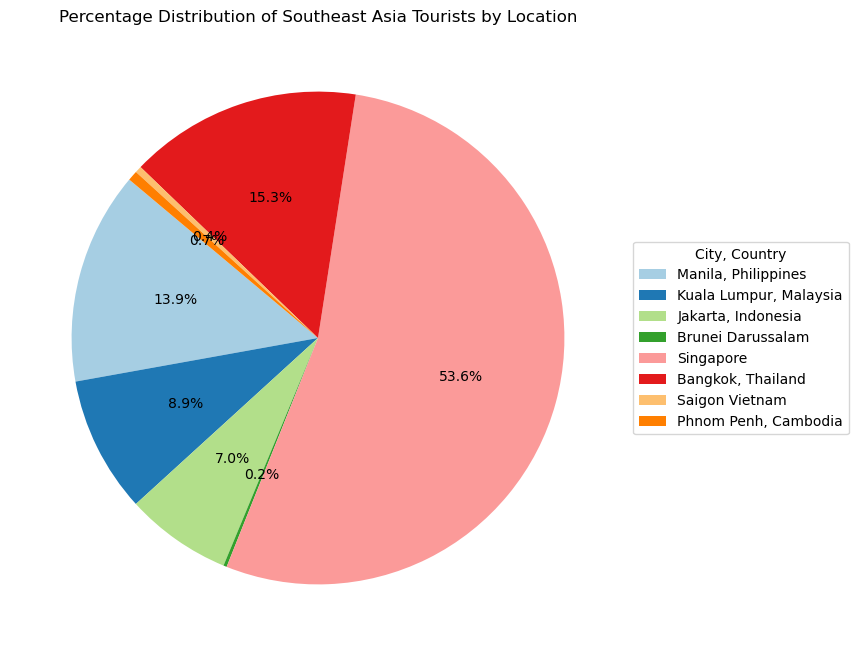

In [231]:
locations = sea_count_data['_id']
counts = sea_count_data['count']

# Rename the '_id' column to 'City, Country'
sea_count_data.rename(columns={'_id': 'City, Country'}, inplace=True)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=140, labeldistance=1.1, colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Southeast Asia Tourists by Location')

# Use the renamed column for legend
plt.legend(sea_count_data['City, Country'], title='City, Country', loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('pie_chart.png', bbox_inches='tight', pad_inches=0.5)
plt.show()


In [232]:
rating_and_class_data

,_id,ratings.overall,offeringDetails[0].hotel_class,offeringDetails[0].name
0,65ac467f7672c3f8efe19282,5,4.0,Andaz 5th Avenue
1,65ac467f7672c3f8efe19635,5,4.5,The Sherry-Netherland Hotel
2,65ac467f7672c3f8efe19703,4,4.5,The Sherry-Netherland Hotel
3,65ac467f7672c3f8efe19764,5,4.0,The Iroquois
4,65ac467f7672c3f8efe1993e,5,5.0,The Chatwal
...,...,...,...,...
454,65ac46b47672c3f8efe94fb8,5,4.0,Library Hotel
455,65ac46b47672c3f8efe95212,5,NaN,Chelsea Pines Inn
456,65ac46b57672c3f8efe95c68,4,4.0,Library Hotel
457,65ac46b57672c3f8efe977be,4,4.0,Library Hotel


In [233]:
rating_and_class = rating_and_class_data.groupby(['offeringDetails[0].hotel_class', 'offeringDetails[0].name'], as_index=False)['ratings.overall'].mean()
rating_and_class['ratings.overall'].fillna(0, inplace=True)
rating_and_class.rename(columns={'offeringDetails[0].name': 'hotel', 'offeringDetails[0].hotel_class': 'hotel_class'}, inplace=True)
rating_and_class = cleaned_data[['hotel', 'hotel_class', 'ratings.overall']]
rating_and_class.columns

Index(['hotel', 'hotel_class', 'ratings.overall'], dtype='object')

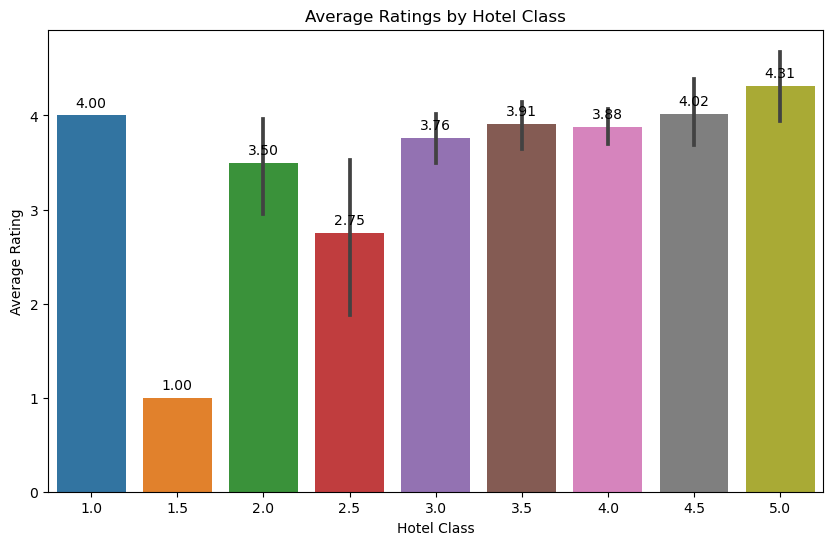

In [234]:
# Bar Plot for Average Ratings by Hotel Class
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='hotel_class', y='ratings.overall', data=rating_and_class)

# Add annotations
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('Average Ratings by Hotel Class')
plt.xlabel('Hotel Class')
plt.ylabel('Average Rating')
plt.show()


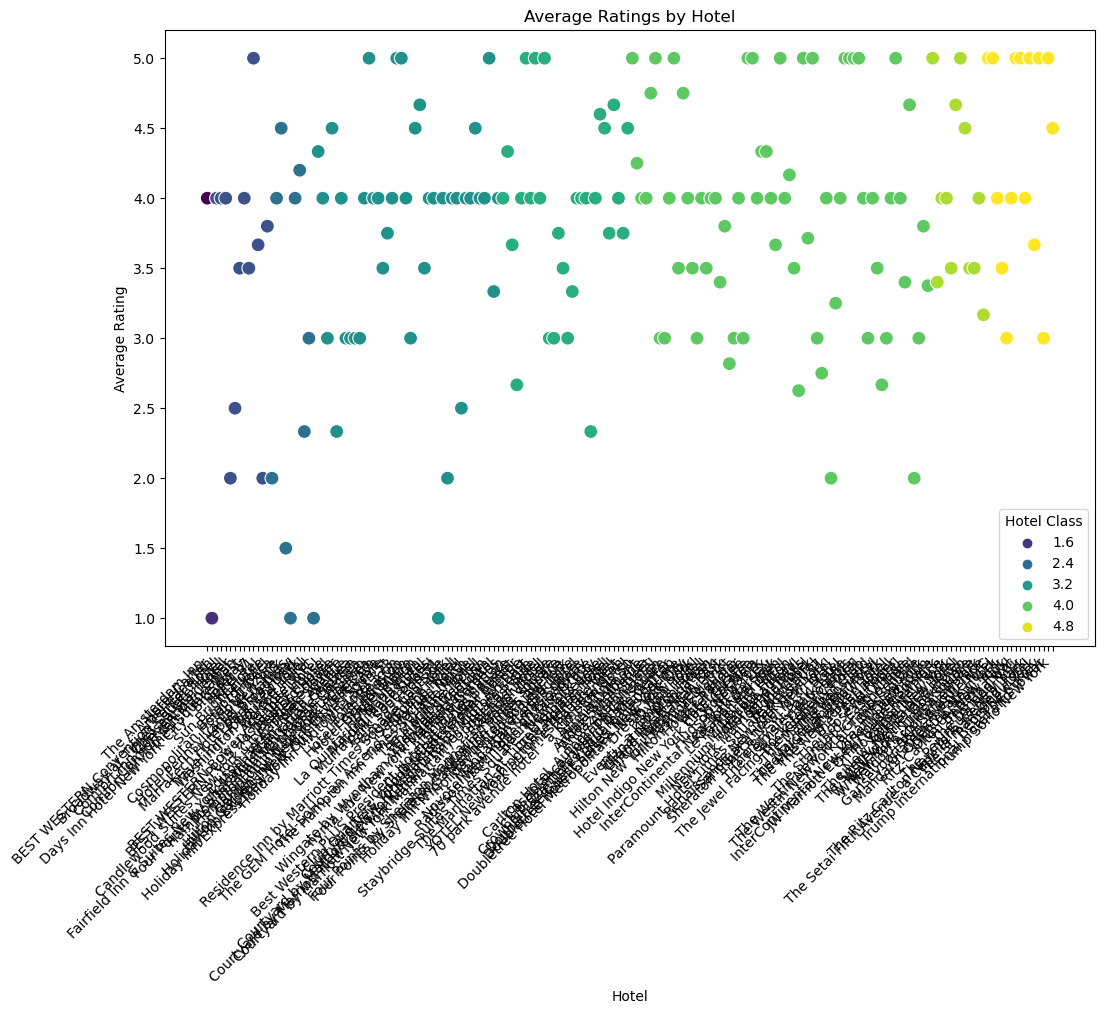

In [235]:
# Scatter Plot for Average Ratings by Hotel
plt.figure(figsize=(12, 8))
sns.scatterplot(x='hotel', y='ratings.overall', hue='hotel_class', data=cleaned_data, palette='viridis', s=100)
plt.title('Average Ratings by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  # Adjust x-axis labels for better visibility
plt.legend(title='Hotel Class')
plt.show()


In [236]:
print(date_stayed_data)

date_stayed_data['date'] = pd.to_datetime(date_stayed_data['_id'], format='%B %Y', errors='coerce')
date_stayed_data.drop('_id', axis=1, inplace=True)
date_stayed_data = date_stayed_data[['date', 'count']]

print(date_stayed_data)


               _id  count
0   September 2007      3
1    November 2009      6
2   September 2005      1
3    November 2003      1
4    February 2008      2
..             ...    ...
75   February 2010      4
76    January 2011      3
77        May 2010      6
78  September 2012      7
79      March 2011      5

[80 rows x 2 columns]
         date  count
0  2007-09-01      3
1  2009-11-01      6
2  2005-09-01      1
3  2003-11-01      1
4  2008-02-01      2
..        ...    ...
75 2010-02-01      4
76 2011-01-01      3
77 2010-05-01      6
78 2012-09-01      7
79 2011-03-01      5

[80 rows x 2 columns]


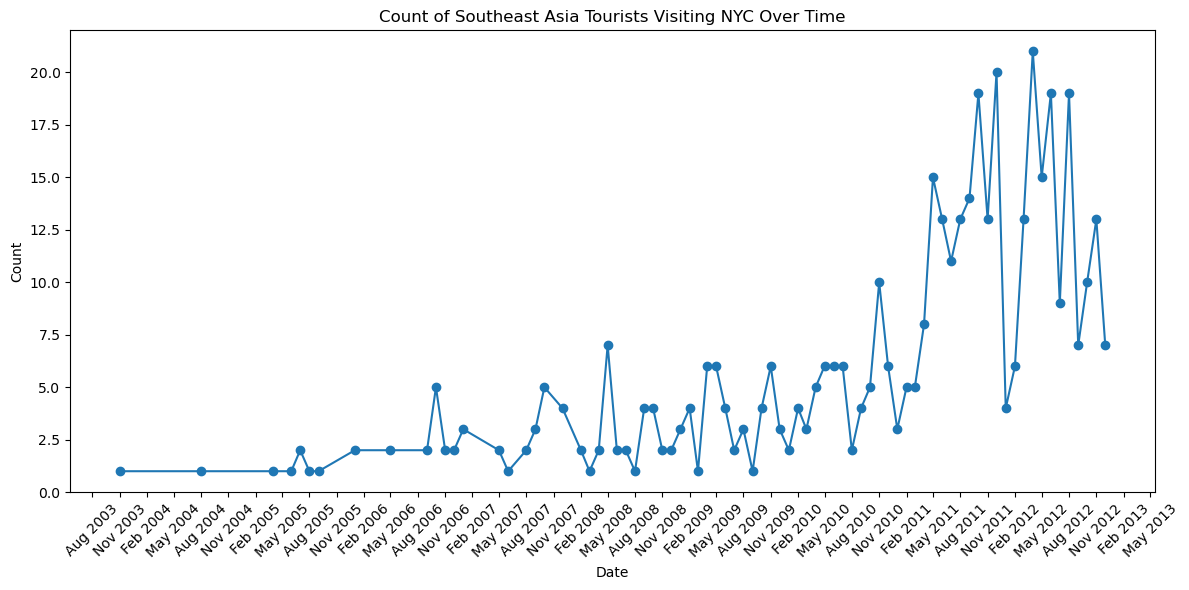

In [237]:
date_stayed_data = date_stayed_data.sort_values(by='date')

plt.figure(figsize=(12, 6))
plt.plot(date_stayed_data['date'], date_stayed_data['count'], marker='o', linestyle='-')
plt.title('Count of Southeast Asia Tourists Visiting NYC Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set major tick marks every three months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format to show month and year
plt.tight_layout()

# Display the plot
plt.show()

In [224]:
top_10_authors = commenting_tourists.nlargest(10, 'count')
print(top_10_authors)



     _id.username            _id.location  count
131   QCInspector               Singapore      7
22     Intrepid88               Singapore      6
352     sweetkaka       Bangkok, Thailand      4
28      Essie2211               Singapore      3
94       sbjohari               Singapore      3
97        Simon63      Jakarta, Indonesia      3
156  TSESingapore               Singapore      3
204       val8700               Singapore      3
218     Richard G  Kuala Lumpur, Malaysia      3
236  orangemuffin               Singapore      3


C:\Users\grace\AppData\Local\Temp\ipykernel_3748\868464686.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = {loc: plt.cm.get_cmap('tab10')(i) for i, loc in enumerate(unique_locations)}
C:\Users\grace\AppData\Local\Temp\ipykernel_3748\868464686.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=color_map[loc], edgecolor='none', linewidth=0) for loc in unique_locations]


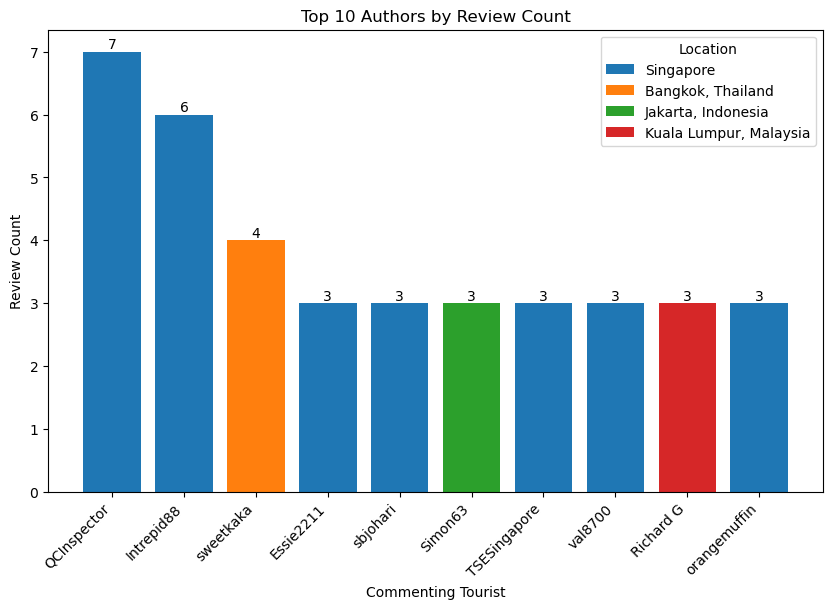

In [225]:
unique_locations = top_10_authors['_id.location'].unique()
color_map = {loc: plt.cm.get_cmap('tab10')(i) for i, loc in enumerate(unique_locations)}

colors = top_10_authors['_id.location'].map(color_map)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_authors['_id.username'], top_10_authors['count'], color=colors)
plt.title('Top 10 Authors by Review Count')
plt.xlabel('Commenting Tourist')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right') 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

handles = [plt.Rectangle((0,0),1,1, color=color_map[loc], edgecolor='none', linewidth=0) for loc in unique_locations]
plt.legend(handles, unique_locations, title='Location')

plt.show()


In [178]:
reviews_data


,_id[0],concatenatedTitles[0],concatenatedTitles[1],concatenatedTitles[2],concatenatedTitles[3],concatenatedTitles[4],concatenatedTitles[5],concatenatedTitles[6],concatenatedTitles[7],concatenatedTitles[8],concatenatedTitles[9],concatenatedTitles[10]
0,Hampton Inn Madison Square Garden,“Accessible from Penn Station”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Morningside Inn,“Inn From HELL”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hotel 373,"“Great, friendly hotel in central location”",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Time,“Defnitely a rip off!”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dylan Hotel,“Good review from me”,“Poor value hotel”,“Excellent boutique hotel in early 20th centur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
196,Holiday Inn Express New York City Fifth Ave,“Great value considering NY prices”,“Tiny rooms but great location”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Hilton Manhattan East,“Average property.. good location”,“A good choice in Midtown East”,“My first time in New York was made more memor...,"“Minus the noise, it would have been a good one.”",“Good value but quiet location”,NaN,NaN,NaN,NaN,NaN,NaN
198,Casablanca Hotel Times Square,“Feel the pulse of New York!”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,Americana Inn,“Best Location”,“Simple and clean”,"“Nice place, good value”",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
reviews_data = reviews_data.fillna("")


In [180]:
reviews_data

,_id[0],concatenatedTitles[0],concatenatedTitles[1],concatenatedTitles[2],concatenatedTitles[3],concatenatedTitles[4],concatenatedTitles[5],concatenatedTitles[6],concatenatedTitles[7],concatenatedTitles[8],concatenatedTitles[9],concatenatedTitles[10]
0,Hampton Inn Madison Square Garden,“Accessible from Penn Station”,,,,,,,,,,
1,Morningside Inn,“Inn From HELL”,,,,,,,,,,
2,Hotel 373,"“Great, friendly hotel in central location”",,,,,,,,,,
3,The Time,“Defnitely a rip off!”,,,,,,,,,,
4,Dylan Hotel,“Good review from me”,“Poor value hotel”,“Excellent boutique hotel in early 20th centur...,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
196,Holiday Inn Express New York City Fifth Ave,“Great value considering NY prices”,“Tiny rooms but great location”,,,,,,,,,
197,Hilton Manhattan East,“Average property.. good location”,“A good choice in Midtown East”,“My first time in New York was made more memor...,"“Minus the noise, it would have been a good one.”",“Good value but quiet location”,,,,,,
198,Casablanca Hotel Times Square,“Feel the pulse of New York!”,,,,,,,,,,
199,Americana Inn,“Best Location”,“Simple and clean”,"“Nice place, good value”",,,,,,,,


In [184]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [199]:
def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation + '“”‘’'))
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    cleaned_text = " ".join(filtered_words)
    return cleaned_text

In [200]:
reviews_data['concatenated_reviews'] = reviews_data.iloc[:, 1:].apply(lambda row: ' '.join(row.dropna()), axis=1)

In [201]:
reviews_data['cleaned_reviews'] = reviews_data['concatenated_reviews'].apply(clean_text)

In [202]:
reviews_data

,_id[0],concatenatedTitles[0],concatenatedTitles[1],concatenatedTitles[2],concatenatedTitles[3],concatenatedTitles[4],concatenatedTitles[5],concatenatedTitles[6],concatenatedTitles[7],concatenatedTitles[8],concatenatedTitles[9],concatenatedTitles[10],concatenated_reviews,cleaned_reviews
0,Hampton Inn Madison Square Garden,“Accessible from Penn Station”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Accessible from Penn Station” “Accessible fro...,accessible penn station accessible penn statio...
1,Morningside Inn,“Inn From HELL”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Inn From HELL” “Inn From HELL” “ inn hell ”,inn hell inn hell inn hell
2,Hotel 373,"“Great, friendly hotel in central location”",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"“Great, friendly hotel in central location” “G...",great friendly hotel central location great fr...
3,The Time,“Defnitely a rip off!”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Defnitely a rip off!” “Defnitely a rip off!” ...,defnitely rip defnitely rip defnitely rip
4,Dylan Hotel,“Good review from me”,“Poor value hotel”,“Excellent boutique hotel in early 20th centur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Good review from me” “Poor value hotel” “Exce...,good review poor value hotel excellent boutiqu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Holiday Inn Express New York City Fifth Ave,“Great value considering NY prices”,“Tiny rooms but great location”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Great value considering NY prices” “Tiny room...,great value considering ny prices tiny rooms g...
197,Hilton Manhattan East,“Average property.. good location”,“A good choice in Midtown East”,“My first time in New York was made more memor...,"“Minus the noise, it would have been a good one.”",“Good value but quiet location”,NaN,NaN,NaN,NaN,NaN,NaN,“Average property.. good location” “A good cho...,average property good location good choice mid...
198,Casablanca Hotel Times Square,“Feel the pulse of New York!”,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Feel the pulse of New York!” “Feel the pulse ...,feel pulse new york feel pulse new york feel p...
199,Americana Inn,“Best Location”,“Simple and clean”,"“Nice place, good value”",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Best Location” “Simple and clean” “Nice place...,best location simple clean nice place good val...


In [203]:
nyc_hotels = reviews_data[['_id[0]', 'cleaned_reviews']].copy()
nyc_hotels.columns = ['hotel', 'cleaned_reviews']

In [204]:
nyc_hotels

,hotel,cleaned_reviews
0,Hampton Inn Madison Square Garden,accessible penn station accessible penn statio...
1,Morningside Inn,inn hell inn hell inn hell
2,Hotel 373,great friendly hotel central location great fr...
3,The Time,defnitely rip defnitely rip defnitely rip
4,Dylan Hotel,good review poor value hotel excellent boutiqu...
...,...,...
196,Holiday Inn Express New York City Fifth Ave,great value considering ny prices tiny rooms g...
197,Hilton Manhattan East,average property good location good choice mid...
198,Casablanca Hotel Times Square,feel pulse new york feel pulse new york feel p...
199,Americana Inn,best location simple clean nice place good val...


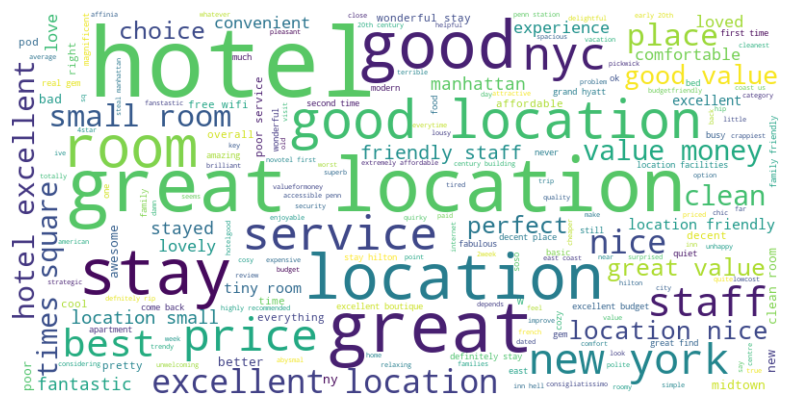

In [207]:
all_cleaned_reviews = " ".join(nyc_hotels['cleaned_reviews'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(all_cleaned_reviews)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
